<a href="https://colab.research.google.com/github/Jdean4747/Data5600HW/blob/main/LogisticRegression5600.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic regression is not significantly affected by scaling features because it does not rely on distance based calculations.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,roc_auc_score, auc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef

In [72]:
df = pd.read_csv("/content/credit_card_clean.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [73]:
targetvar = "DEFAULT"
print(df[targetvar].value_counts(normalize=True))

DEFAULT
0    0.7788
1    0.2212
Name: proportion, dtype: float64


This target variable has a non-default appearance of 77.88% with a default appearance of 22.12%. This is relatively imbalanced since they are nowhere near 50%.

In [74]:
category = ["SEX","EDUCATION","MARRIAGE"]
df = pd.get_dummies(df, columns=category, drop_first=True, dtype=int)

In [75]:
df.head()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,SEX_male,EDUCATION_highschool,EDUCATION_other,EDUCATION_university,MARRIAGE_other,MARRIAGE_single
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,...,0.0,0.0,0.0,1,0,0,0,1,0,0
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,...,1000.0,0.0,2000.0,1,0,0,0,1,0,1
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,1000.0,1000.0,5000.0,0,0,0,0,1,0,1
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,1100.0,1069.0,1000.0,0,0,0,0,1,0,0
4,5,50000.0,57,-1,0,-1,0,0,0,8617.0,...,9000.0,689.0,679.0,0,1,0,0,1,0,0


We took away three features and added six that are the three we took away, but in different data types so we are able to do the logistic regression with this data.

In [76]:
x = df.drop("ID", axis=1)
x = x.drop(columns=[targetvar], axis=1)
y = df[targetvar]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [77]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [78]:
y_hat_prob = model.predict_proba(x_test)
y_hat = model.predict(x_test)

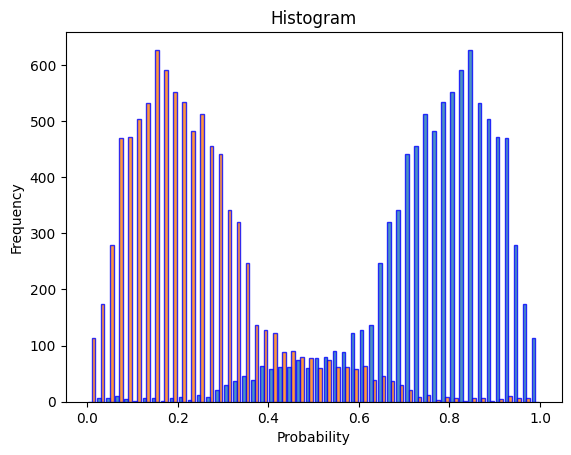

In [79]:
plt.hist(y_hat_prob, bins=50, alpha=0.8, edgecolor='blue')
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()


Setting a threshold of 0.8 will lower recall which makes it harder to find positive cases. Choosing the right threshold depends on if you want precision to avoid false positives or recall to avoid false negatives.

In [80]:
print(y_hat_prob.shape)

if len(y_hat_prob.shape) == 2:
    y_hat_prob = y_hat_prob[:, 1]
print(y_hat_prob.shape)

y_hat_30 = (y_hat_prob >= 0.30).astype(int)
y_hat_60 = (y_hat_prob >= 0.60).astype(int)
print(y_hat_30[:20])
print()
print(y_hat_60[:20])


(9000, 2)
(9000,)
[1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1]

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1]


The y_hat_30 is more likely to avoid too many false negatives because the lower the probability the higher chances it can be a positive case.

In [81]:
df_predictions = pd.DataFrame({
    'y_test': y_test,
    'y_hat': y_hat,
    'y_hat_probs': y_hat_prob,
    'y_hat_30': y_hat_30,
    'y_hat_60': y_hat_60
})

print(df_predictions.head(20))

       y_test  y_hat  y_hat_probs  y_hat_30  y_hat_60
2308        0      0     0.340285         1         0
22404       0      0     0.233209         0         0
23397       0      0     0.271059         0         0
25058       0      0     0.200095         0         0
2664        1      0     0.261345         0         0
8511        0      0     0.212677         0         0
5148        1      0     0.361270         1         0
7790        0      0     0.152006         0         0
11311       0      0     0.112953         0         0
19043       0      0     0.138802         0         0
10784       0      1     0.620031         1         1
22246       0      0     0.147447         0         0
3268        0      0     0.236976         0         0
15947       1      1     0.922858         1         1
14977       0      0     0.160968         0         0
14474       0      0     0.133591         0         0
28694       0      0     0.252176         0         0
14054       0      0     0.2

In [82]:
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_hat: {len(y_hat)}")
print(f"Length of y_hat_probs: {len(y_hat_prob)}")
print(f"Length of y_hat_30: {len(y_hat_30)}")
print(f"Length of y_hat_60: {len(y_hat_60)}")


Length of y_test: 9000
Length of y_hat: 9000
Length of y_hat_probs: 9000
Length of y_hat_30: 9000
Length of y_hat_60: 9000


In [83]:
def my_logistic_report(x_train, y_train, x_test, y_test, threshold=0.5, penalty=None, class_weight=None):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    logistic = LogisticRegression(class_weight=class_weight, penalty=penalty, max_iter=1000)
    logistic.fit(x_train_scaled, y_train)

    probs = logistic.predict_proba(x_test_scaled)[:, 1]
    y_hat = np.where(probs >= threshold, 1, 0)

    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test, y_hat), 2)
    precision = round(precision_score(y_test, y_hat), 2)
    recall = round(recall_score(y_test, y_hat), 2)
    f1score = round(f1_score(y_test, y_hat), 2)
    MCC = round(matthews_corrcoef(y_test, y_hat), 2)

    cm_labeled = pd.DataFrame(cm, index=['Actual: negative', 'Actual: positive'], columns=['Predict: negative', 'Predict: positive'])

    print("-----------------------------------------")
    print(f'Accuracy  = {accuracy}')
    print(f'Precision = {precision}')
    print(f'Recall    = {recall}')
    print(f'f1_score  = {f1score}')
    print(f'MCC       = {MCC}')
    print("-----------------------------------------")
    return cm_labeled

cm_labeled = my_logistic_report(x_train, y_train, x_test, y_test, threshold=0.5)
print(cm_labeled)



-----------------------------------------
Accuracy  = 0.81
Precision = 0.68
Recall    = 0.23
f1_score  = 0.35
MCC       = 0.32
-----------------------------------------
                  Predict: negative  Predict: positive
Actual: negative               6824                216
Actual: positive               1501                459


The accuracy was 0.81 which means that 81 percent of the predictions are correct. The precision is 0.68 which means that when the prediction is a positive class then it is correct 68 percent of the time. A recall of 0.23 means that 23 percent of the positive cases were correctly predicted. The F1 score is 0.35 which means that the precision and recall are not strong statistics. A MCC of 0.32 means that the model is making more correct than incorrect predictions, but not by a lot.

In [84]:
def my_logistic_report(x_train, y_train, x_test, y_test, threshold=0.3, penalty=None, class_weight=None):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    logistic = LogisticRegression(class_weight=class_weight, penalty=penalty, max_iter=1000)
    logistic.fit(x_train_scaled, y_train)

    probs = logistic.predict_proba(x_test_scaled)[:, 1]
    y_hat = np.where(probs >= threshold, 1, 0)

    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test, y_hat), 2)
    precision = round(precision_score(y_test, y_hat), 2)
    recall = round(recall_score(y_test, y_hat), 2)
    f1score = round(f1_score(y_test, y_hat), 2)
    MCC = round(matthews_corrcoef(y_test, y_hat), 2)

    cm_labeled = pd.DataFrame(cm, index=['Actual: negative', 'Actual: positive'], columns=['Predict: negative', 'Predict: positive'])

    print("-----------------------------------------")
    print(f'Accuracy  = {accuracy}')
    print(f'Precision = {precision}')
    print(f'Recall    = {recall}')
    print(f'f1_score  = {f1score}')
    print(f'MCC       = {MCC}')
    print("-----------------------------------------")
    return cm_labeled

cm_labeled = my_logistic_report(x_train, y_train, x_test, y_test, threshold=0.3)
print(cm_labeled)



-----------------------------------------
Accuracy  = 0.8
Precision = 0.55
Recall    = 0.46
f1_score  = 0.5
MCC       = 0.38
-----------------------------------------
                  Predict: negative  Predict: positive
Actual: negative               6299                741
Actual: positive               1057                903


Accuracy went down slightly as precision decreased by a lot. Recall and f1 score increase by over 0.1 with MCC increasing by 0.06. Lowering the threshold allows you to avoid false negatives which in this case is better with a F1 score of 0.5 because recall increases a lot while the balance between accuracy and precision remains similar.

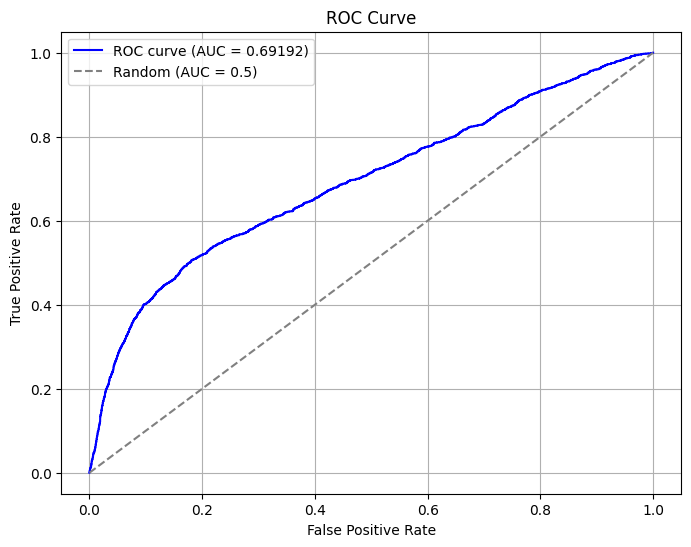

AUC Score: 0.69192


In [85]:
fpr, tpr, _ = roc_curve(y_test, y_hat_prob)
auc_score = roc_auc_score(y_test, y_hat_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.5f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

print(f"AUC Score: {auc_score:.5f}")


My model is doing better than a random prediction of 0.5 with mine at about 0.69.